## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline
import seaborn as sns
import math
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [190]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categeoricla variables that are correlated, keep the one with fewer values.

In [191]:
# answer below:
absent.corr()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


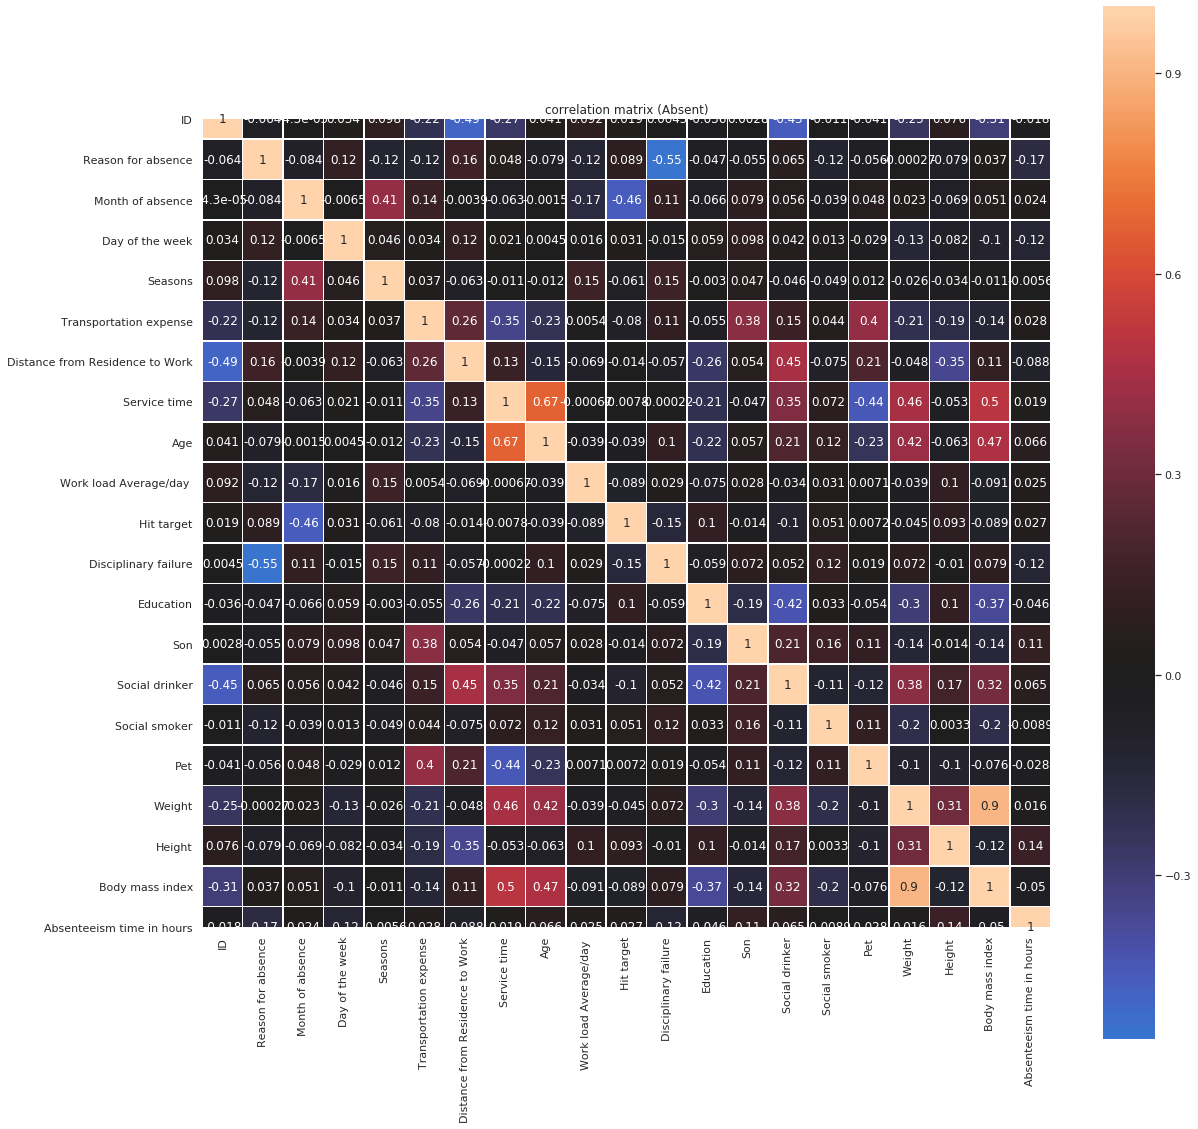

In [192]:
# make the correlation matrices.
corrmat_absent = absent.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(19,19))
# draw the heatmap using seaborn.
sns.heatmap(corrmat_absent, square=True, annot=True, linewidths=.5, center = 0)
plt.title("correlation matrix (Absent)")
plt.show()

Find out which columns contain categorical variables and turn those into dummy variables.

In [193]:
# Create correlation matrix
corr_matrix = absent.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] >= .50)]
print(to_drop)

['Age', 'Disciplinary failure', 'Body mass index']


In [0]:
absent.drop(columns=to_drop, inplace=True)


In [0]:
absent.drop('ID',1, inplace= True)

In [196]:
# answer below:
absent.dtypes

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Work load Average/day              float64
Hit target                           int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Absenteeism time in hours            int64
dtype: object

In [197]:
absent.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Hit target', 'Education',
       'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Absenteeism time in hours'],
      dtype='object')

In [198]:
absent.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,26,7,3,1,289,36,13,239.554,97,1,2,1,0,1,90,172,4
1,0,7,3,1,118,13,18,239.554,97,1,1,1,0,0,98,178,0
2,23,7,4,1,179,51,18,239.554,97,1,0,1,0,0,89,170,2
3,7,7,5,1,279,5,14,239.554,97,1,2,1,1,0,68,168,4
4,23,7,5,1,289,36,13,239.554,97,1,2,1,0,1,90,172,2


Split the data into train and test with test containing 20% of the data.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split
X = absent.drop('Absenteeism time in hours',1)
y = absent['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1337)


Train a KNN regression model using k=15 and compute the MSE for the test subsample.

In [0]:
# answer below
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=22)
results = regressor.fit(X_train, y_train)

In [202]:
results.score(X_train,y_train)

0.07587466927387465

In [203]:
results.score(X_test,y_test)

0.06214892422660068

In [0]:
# Compute the MSE for the test subsample

In [0]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

error_list = []

# Calculating error for K values between ??? step by ??
for i in range(1, 50, 1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_list.append(np.mean(pred_i != y_test))

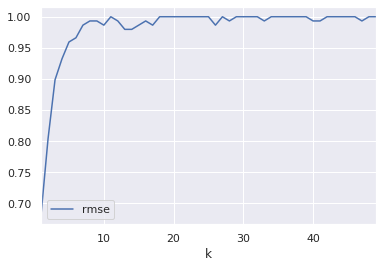

In [206]:
pd.DataFrame({'k':range(1,50,1), 'rmse': error_list}).plot(x='k',y='rmse')

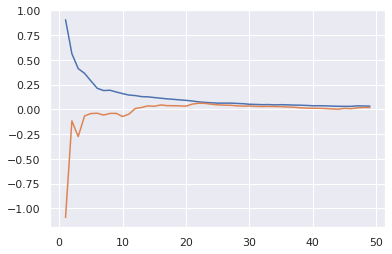

In [207]:
k_range = range(1, 50, 1)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.plot(k_range, train_scores)
plt.plot(k_range, test_scores)
plt.show()